In [9]:
from simtk.openmm import app
import simtk.openmm as mm
from simtk import unit
import numpy as np


In [ ]:
# we'll do ethane first and then butane after

In [2]:
pdb = app.PDBFile("ethane.pdb")
forcefield = app.ForceField("ethane.gaff2.xml")

In [3]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)


In [4]:
integrator = mm.LangevinIntegrator(298.15*unit.kelvin, 5.0/unit.picoseconds, 2.0*unit.femtoseconds)
integrator.setConstraintTolerance(1e-5)


In [5]:
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)


In [6]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")


Minimizing...
Potential energy before minimization is 4.467818224810638 kJ/mol
Potential energy after minimization is 4.3899676789226865 kJ/mol


In [7]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 100, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*unit.kelvin)
simulation.step(2500)


Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,11.724775958164004,63.375881066510125
200,17.097042469741936,303.4441965723903
300,29.38642965960553,291.71339484655334
400,16.53171040214068,267.6298324260874
500,20.29901421204707,244.5002054717494
600,22.089579617072513,385.8357942231739
700,27.08687548981968,124.93077302137175
800,24.081882384044878,374.7707791820384
900,13.009332139351201,475.25728012257946
1000,25.292764623775096,427.07259039321633
1100,22.757579519994863,540.6242322442516
1200,24.159970652415648,363.1610129444239
1300,20.734963790551916,287.359853558435
1400,19.84031179279865,281.7662497641331
1500,17.73473637967227,252.07234888703667
1600,30.3915313255943,334.6055919593649
1700,18.665247703748005,424.8948686427261
1800,21.379392031329814,253.34234697347847
1900,20.036697639174847,492.00573746516477
2000,15.158380795445371,365.2738111462507
2100,18.173195784844996,212.53220704026938
2200,19.55932457060726,501.370902750868
2300,21.0929719

In [8]:
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.DCDReporter('ethane_sim.dcd', 100))

# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')


Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
250000,500.0000000016593,24.028609982390066,331.52299888086054,0
500000,999.9999999901769,22.232955425951147,455.51837383862056,4.55e+04
750000,1499.9999999783536,12.998872074877276,387.3099601129095,4.53e+04
1000000,1999.9999999665301,21.237627390440707,196.65352110346765,4.52e+04
1250000,2499.9999999547067,30.34031857864118,207.35171035673568,4.53e+04
1500000,2999.9999999428833,15.505822089030046,290.41025239896175,4.53e+04
1750000,3499.99999993106,25.83981304673168,206.24126660567507,4.54e+04
2000000,3999.9999999192364,17.9867297080901,371.8782186455961,4.54e+04
2250000,4499.9999999992715,15.125394002173824,323.4230739466208,4.54e+04
2500000,5000.000000101135,25.328273059105296,288.9940395621154,4.54e+04
2750000,5500.000000202998,21.695443727792263,160.03116751289542,4.54e+04
3000000,6000.000000304862,24.60795107261455,195.49650340676467,4.55e+04
3250000,6500.000000406725,15.635

In [9]:
#butane
# read in a starting structure for butane and the
# corresponding force field file
pdb = app.PDBFile('butane.pdb')
forcefield = app.ForceField('butane.gaff2.xml')

# setup system by taking topology from pdb file;
# run gas phase simulation with 2 fs time step (using SHAKE)
# at 298.15 K using a Langevin thermostat (integrator) with
# coupling constant of 5.0 ps^-1
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, 
                                 constraints=app.HBonds)
integrator = mm.LangevinIntegrator(298.15*unit.kelvin, 5.0/unit.picoseconds, 
                                   2.0*unit.femtoseconds)
integrator.setConstraintTolerance(1e-5)

platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)



In [10]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print("Potential energy before minimization is %s" % st.getPotentialEnergy())

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print("Potential energy after minimization is %s" % st.getPotentialEnergy())


Minimizing...
Potential energy before minimization is 5.797528654036221 kJ/mol
Potential energy after minimization is 5.295784444937313 kJ/mol


In [11]:
print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 250, step=True, potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*unit.kelvin)
simulation.step(5000)



Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
250,27.502662882687044,276.3833509651641
500,38.618408589001504,280.1316647244189
750,29.919954741979307,393.97080372397625
1000,42.368331619457265,531.9360180559851
1250,34.56169542773281,190.72684139128458
1500,46.7072852417593,241.62193874006365
1750,38.60145650079552,320.90897069037595
2000,34.16960121962788,219.76879984562024
2250,33.84942704211073,277.24847518033135
2500,43.48801555967401,251.08050256448362
2750,40.382346510302355,291.01005176738
3000,45.07415330959055,221.17975812396446
3250,37.349518064184394,284.3428070657984
3500,26.672390580164425,285.9656351149843
3750,36.10625996218253,554.530785048354
4000,31.26972084789746,248.9755580925157
4250,45.633525061580094,312.5224932716082
4500,37.85296220048282,219.78385413035963
4750,44.51760651874111,137.71124063855382
5000,49.34382656839535,296.3161440154719


In [12]:
print('Running Production...')

tinit=time.time()
simulation.reporters.clear()
# output basic simulation information below every 500000 steps/1 ns
simulation.reporters.append(app.StateDataReporter(stdout, 500000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))
# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps/0.2 ps
simulation.reporters.append(app.DCDReporter('butane_sim.dcd', 100))

# run the simulation for 2.0x10^7 steps/40 ns
simulation.step(20000000)
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')



Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
500000,999.9999999901769,41.14290062239741,273.48449690125153,0
1000000,1999.9999999665301,53.929067651299114,314.8876332099858,2.14e+04
1500000,2999.9999999428833,41.387686727671884,281.00746574240486,2.14e+04
2000000,3999.9999999192364,35.27837236523314,211.2635409607208,2.15e+04
2500000,5000.000000101135,39.923664063372,475.446969987344,2.15e+04
3000000,6000.000000304862,38.41165976513856,271.27483500301673,2.15e+04
3500000,7000.0000005085885,49.082627566023504,450.2117881149852,2.15e+04
4000000,8000.000000712315,56.49967891899155,156.90720322899577,2.16e+04
4500000,9000.000000916041,39.427645590396764,358.77912729554976,2.16e+04
5000000,10000.000001119768,33.00994424354637,338.30189365071493,2.16e+04
5500000,11000.000001323495,39.62625412294137,352.05314180857636,2.17e+04
6000000,12000.000001527222,41.26477982556155,213.18197170435923,2.17e+04
6500000,13000.000001730948,47.2858

In [1]:
#analysis for ethane
#we'll call the ethane trajectory trajE
import mdtraj as md
trajE = md.load('ethane_sim.dcd', top='ethane.pdb')

In [2]:
import nglview as nv

t = nv.MDTrajTrajectory(trajE)
w = nv.NGLWidget(t)
w


NGLWidget(max_frame=99999)

In [3]:
atoms, bonds = trajE.topology.to_dataframe()
atoms


,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,ETH,0,
1,2,H11,H,1,ETH,0,
2,3,H12,H,1,ETH,0,
3,4,H13,H,1,ETH,0,
4,5,C2,C,1,ETH,0,
5,6,H21,H,1,ETH,0,
6,7,H22,H,1,ETH,0,
7,8,H23,H,1,ETH,0,


In [4]:
bond_indices = [0, 4] # atoms to define the bond length
bond_length = md.compute_distances(trajE, [bond_indices])


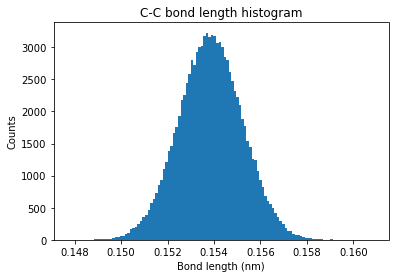

In [17]:
import matplotlib.pyplot as plt

bondcounts, binedges, otherstuff = plt.hist(bond_length, bins=120)
plt.title('C-C bond length histogram')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()


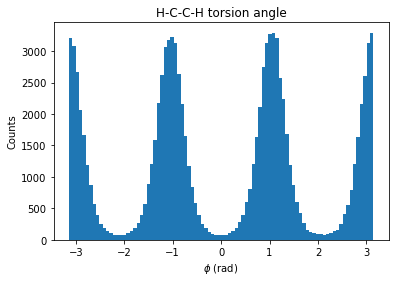

In [6]:
# H-C-C-H torsion angle
phi_indices = [1, 0, 4, 5] # atoms to define the torsion angle
phi = md.compute_dihedrals(trajE, [phi_indices])
phicounts, binedges, otherstuff = plt.hist(phi, bins=90) # create a histogram with 90 bins
plt.title('H-C-C-H torsion angle')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Counts')
plt.show()


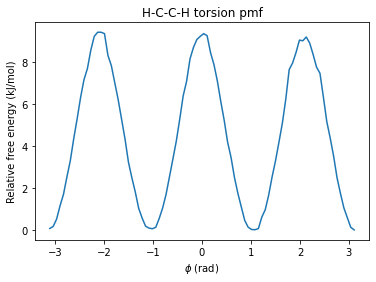

In [10]:
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
phicounts[phicounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(phicounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('H-C-C-H torsion pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()


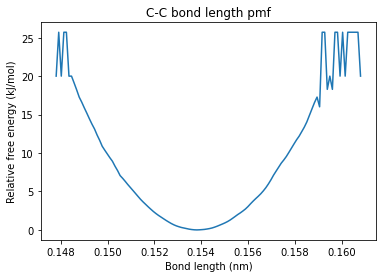

In [18]:
import statsmodels.api as sm
bondcounts[bondcounts==0] = 0.1
pmf = -kB*Temp*np.log(bondcounts)
pmf = pmf - np.min(pmf)

bincenters = (binedges[1:] + binedges[:-1])/2

pmf_smoothed = sm.nonparametric.lowess(pmf, bincenters, frac=0.05)
pmf_s = pmf_smoothed[:,1] - np.min(pmf_smoothed[:,1])

plt.plot(bincenters, pmf_s)
plt.xlabel('Bond length (nm)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.title('C-C bond length pmf')
plt.show()


In [21]:
trajE.xyz[0]

array([[-0.21061642,  0.22508581,  0.03334537],
       [-0.2010633 ,  0.15173241,  0.11435226],
       [-0.17979261,  0.3220044 ,  0.07446425],
       [-0.14362925,  0.19893661, -0.04949809],
       [-0.35278797,  0.23656671, -0.02895059],
       [-0.37195107,  0.14144908, -0.08013164],
       [-0.35763457,  0.3162994 , -0.10413903],
       [-0.43293747,  0.24620222,  0.04532805]], dtype=float32)

In [176]:
#analysis for butane
traj = md.load('butane_sim.dcd', top='butane.pdb')
atoms, bonds = traj.topology.to_dataframe()
atoms



,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


In [177]:
import nglview as nv

t = nv.MDTrajTrajectory(traj)
w = nv.NGLWidget(t)
w

NGLWidget(max_frame=199999)

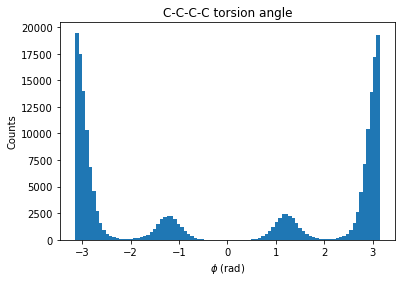

200000.0


In [178]:
phi_indices = [0, 4, 7, 10] # atoms to define the torsion angle
phi = md.compute_dihedrals(traj, [phi_indices])

phicounts, binedges, otherstuff = plt.hist(phi, bins=90) # create a histogram with 90 bins
plt.title('C-C-C-C torsion angle')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Counts')
plt.show()

print(np.sum(phicounts))


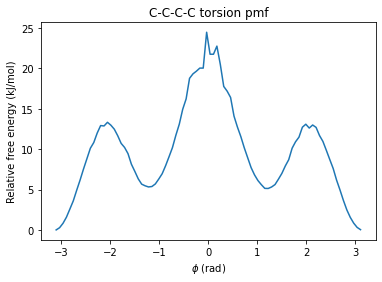

In [179]:
B = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature in K
phicounts[phicounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(phicounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('C-C-C-C torsion pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()


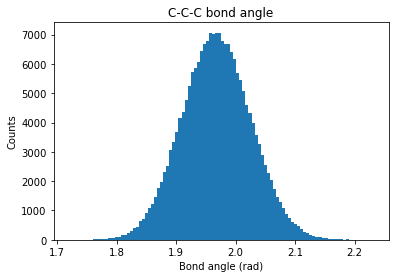

In [180]:
angle_indices = [0, 4, 7] # or could do [4, 7, 10]
bondangle = md.compute_angles(traj, [angle_indices])

anglecounts, binedges, otherstuff = plt.hist(bondangle, bins=100)
plt.title('C-C-C bond angle')
plt.xlabel('Bond angle (rad)')
plt.ylabel('Counts')
plt.show()



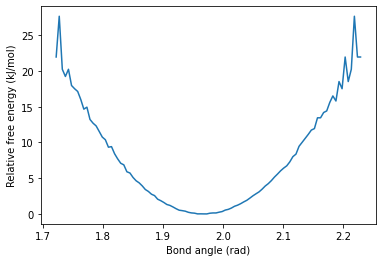

In [181]:
anglecounts[anglecounts==0] = 0.1
pmf = -kB*Temp*np.log(anglecounts)
pmf = pmf - np.min(pmf)

bincenters = (binedges[1:] + binedges[:-1])/2


plt.plot(bincenters, pmf)
plt.xlabel('Bond angle (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()


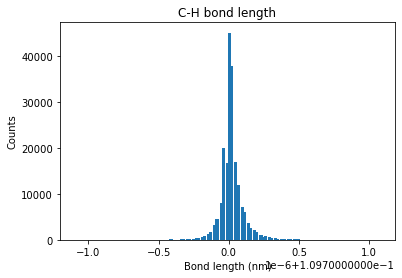

In [182]:
bond_indices = [0, 1] # many possibilities!
bondlength = md.compute_distances(traj, [bond_indices])

lengthcounts, binedges, otherstuff = plt.hist(bondlength, bins=100)
plt.title('C-H bond length')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()


In [183]:
#Quick PCA analysis -
#going to use C1 to C3 and C4 distances and dihedrals
#using all coordinates did not give good info

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [185]:
indicies = [[0,10],[0,7]]
dist = []
for i in indicies:
    d = md.compute_distances(traj,[i])[:,0]
    dist.append(d)
dist = np.stack(dist,axis=1)

In [186]:
feat_arr = np.append(dist,phi,axis=1)

In [187]:
feat_arr.shape
scaler = StandardScaler()
scaler.fit(feat_arr)
scaled_data = scaler.transform(feat_arr)
pca=PCA(n_components=2)
pca.fit(scaled_data)
proj=pca.transform(scaled_data)

In [188]:
#histogram the data for free energy plot
z,x,y = np.histogram2d(proj[:,0],proj[:,1],bins=200)
extent = (x.min(),x.max(),y.min(),y.max())
F = -np.log(z)
F[F==np.inf]=-1000
maxval=np.amax(F)
F[F==-1000]=maxval
F[F==-0]=0.00001

/home/t/anaconda3/envs/mm-tools/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


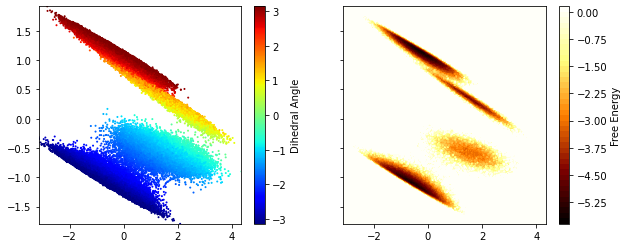

In [189]:
#plot feature and free energy surface onto PCs
fig,axes = plt.subplots(1,2,figsize=(10,4),sharex=True,sharey=True)
a = axes[0].scatter(proj[:,0],proj[:,1],c=phi,cmap="jet",s=1)
cbar1=fig.colorbar(a,ax=axes[0])
cbar1.set_label("Dihedral Angle")
b=axes[1].contourf(F.T,50,cmap="afmhot",extent=extent)
cbar2 = fig.colorbar(b,ax=axes[1])
cbar2.set_label("Free Energy")


In [190]:
traj = traj.center_coordinates()
traj = traj.superpose(traj,frame=0)

mdtraj/rmsd/src/theobald_rmsd.cpp UNCONVERGED ROTATION MATRIX. RETURNING IDENTITY=296
mdtraj/rmsd/src/theobald_rmsd.cpp UNCONVERGED ROTATION MATRIX. RETURNING IDENTITY=296
mdtraj/rmsd/src/theobald_rmsd.cpp UNCONVERGED ROTATION MATRIX. RETURNING IDENTITY=296
mdtraj/rmsd/src/theobald_rmsd.cpp UNCONVERGED ROTATION MATRIX. RETURNING IDENTITY=296


In [191]:
coods = traj.xyz
dist = []
for i in range(coords.shape[1]):
    d = coords[:,i]
    dist.append(d)
coord_feat=np.concatenate(dist,axis=1)


In [192]:
pca=PCA(n_components=2)
pca.fit(coord_feat)
proj1=pca.transform(coord_feat)

In [193]:
#histogram the data for free energy plot
z,x,y = np.histogram2d(proj1[:,0],proj1[:,1],bins=200)
extent = (x.min(),x.max(),y.min(),y.max())
F = -np.log(z)
F[F==np.inf]=-1000
maxval=np.amax(F)
F[F==-1000]=maxval
F[F==-0]=0.00001

/home/t/anaconda3/envs/mm-tools/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


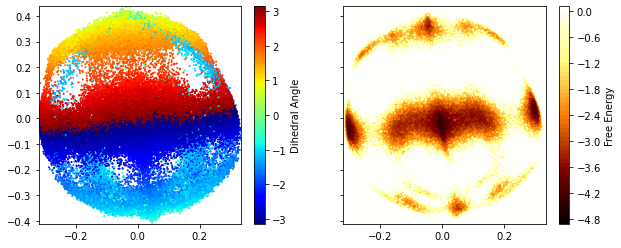

In [194]:
#plot feature and free energy surface onto PCs
fig,axes = plt.subplots(1,2,figsize=(10,4),sharex=True,sharey=True)
a = axes[0].scatter(proj1[:,0],proj1[:,1],c=phi,cmap="jet",s=1)
cbar1=fig.colorbar(a,ax=axes[0])
cbar1.set_label("Dihedral Angle")
b=axes[1].contourf(F.T,50,cmap="afmhot",extent=extent)
cbar2 = fig.colorbar(b,ax=axes[1])
cbar2.set_label("Free Energy")
